In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import folium

In [2]:
import pandas as pd
dataset = '825230136_Data_Bersih.xlsx'

df_data = pd.read_excel(dataset)
df_data.head()

,TANGGAL,TN,TX,TAVG,RH_AVG,RR,SS,FF_X,DDD_X,FF_AVG,DDD_CAR
0,2010-01-01,24.0,32.4,26.8,86,9.8,2.7,9,180,3,NW
1,2010-01-02,25.0,33.2,27.0,82,1.0,2.9,3,315,2,NW
2,2010-01-03,24.0,33.4,27.3,84,1.0,5.4,4,45,2,N
3,2010-01-04,24.0,33.6,27.5,84,7.0,5.5,3,270,2,W
4,2010-01-05,23.0,30.9,25.9,90,9.6,4.3,3,315,2,NW


In [3]:
df_data.head(4)

,TANGGAL,TN,TX,TAVG,RH_AVG,RR,SS,FF_X,DDD_X,FF_AVG,DDD_CAR
0,2010-01-01,24.0,32.4,26.8,86,9.8,2.7,9,180,3,NW
1,2010-01-02,25.0,33.2,27.0,82,1.0,2.9,3,315,2,NW
2,2010-01-03,24.0,33.4,27.3,84,1.0,5.4,4,45,2,N
3,2010-01-04,24.0,33.6,27.5,84,7.0,5.5,3,270,2,W


In [4]:
df_data.columns

Index(['TANGGAL', 'TN', 'TX', 'TAVG', 'RH_AVG', 'RR', 'SS', 'FF_X', 'DDD_X',
       'FF_AVG', 'DDD_CAR'],
      dtype='object')

In [5]:
df_data.isna().sum()/len(df_data)*100

,0
TANGGAL,0.0
TN,0.0
TX,0.0
TAVG,0.0
RH_AVG,0.0
RR,0.0
SS,0.0
FF_X,0.0
DDD_X,0.0
FF_AVG,0.0


In [6]:
df_data = df_data.ffill()

In [7]:
df_data.isna().sum()/len(df_data)*100

,0
TANGGAL,0.0
TN,0.0
TX,0.0
TAVG,0.0
RH_AVG,0.0
RR,0.0
SS,0.0
FF_X,0.0
DDD_X,0.0
FF_AVG,0.0


In [8]:
#Mencetak 5 baris terakhir
df_data.tail()

,TANGGAL,TN,TX,TAVG,RH_AVG,RR,SS,FF_X,DDD_X,FF_AVG,DDD_CAR
5474,2024-12-27,23.4,32.2,27.2,89,37.5,0.4,3,280,1,C
5475,2024-12-28,24.7,32.8,27.1,92,37.5,2.4,4,310,1,C
5476,2024-12-29,23.5,34.4,26.4,88,4.2,1.7,6,160,2,W
5477,2024-12-30,22.7,33.0,26.3,88,59.5,5.5,5,300,1,C
5478,2024-12-31,22.8,32.4,27.5,83,0.3,5.1,4,270,1,W


In [9]:
# Pastikan kolom Tahun ada
df_data['Tahun'] = pd.to_datetime(df_data['TANGGAL']).dt.year

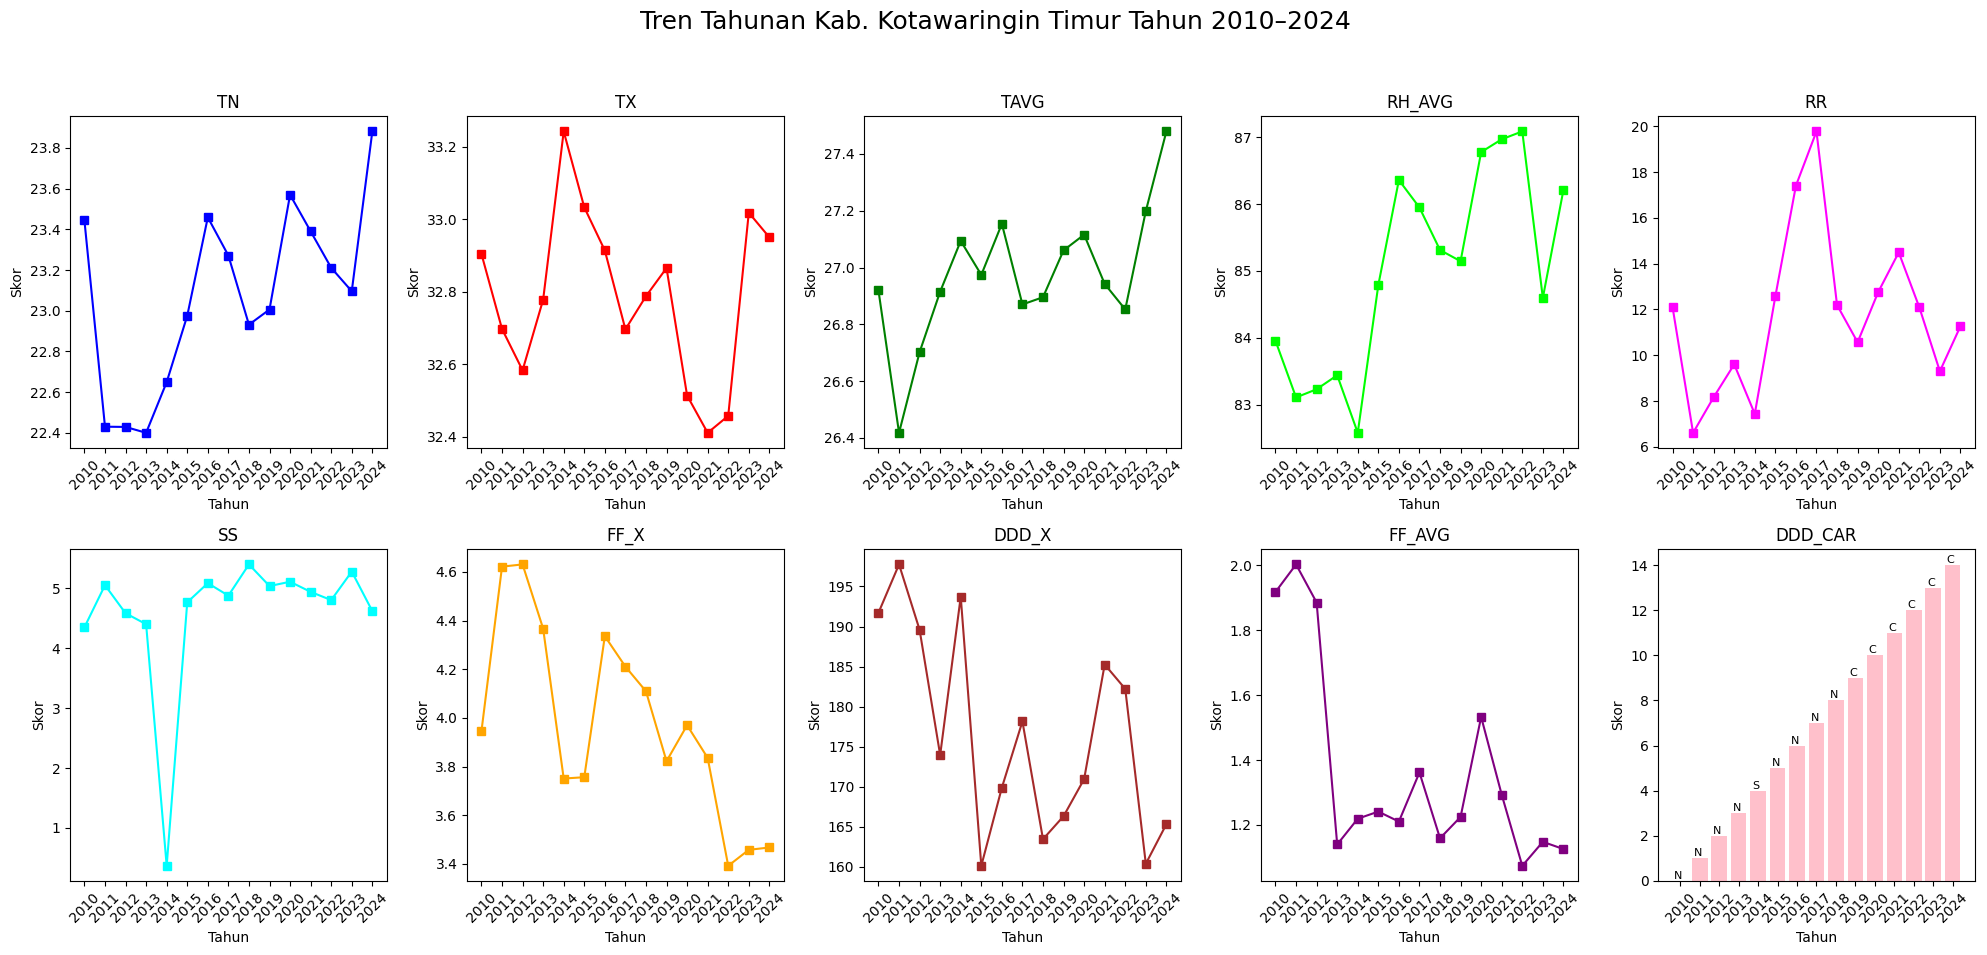

In [10]:
fig = plt.subplots(2, 5, figsize=(20, 10))

df_data['Tahun'] = df_data['Tahun'].astype(int)
tahun_list = sorted(df_data['Tahun'].unique())

plt.subplot(2, 5, 1)
df_data.groupby('Tahun')['TN'].mean().plot(marker='s', color='blue')
plt.title('TN')
plt.ylabel('Skor')
plt.xlabel('Tahun')
plt.xticks(ticks=tahun_list, rotation=45)

plt.subplot(2, 5, 2)
df_data.groupby('Tahun')['TX'].mean().plot(marker='s', color='red')
plt.title('TX')
plt.ylabel('Skor')
plt.xlabel('Tahun')
plt.xticks(ticks=tahun_list, rotation=45)

plt.subplot(2, 5, 3)
df_data.groupby('Tahun')['TAVG'].mean().plot(marker='s', color='green')
plt.title('TAVG')
plt.ylabel('Skor')
plt.xlabel('Tahun')
plt.xticks(ticks=tahun_list, rotation=45)

plt.subplot(2, 5, 4)
df_data.groupby('Tahun')['RH_AVG'].mean().plot(marker='s', color='lime')
plt.title('RH_AVG')
plt.ylabel('Skor')
plt.xlabel('Tahun')
plt.xticks(ticks=tahun_list, rotation=45)

plt.subplot(2, 5, 5)
df_data.groupby('Tahun')['RR'].mean().plot(marker='s', color='magenta')
plt.title('RR')
plt.ylabel('Skor')
plt.xlabel('Tahun')
plt.xticks(ticks=tahun_list, rotation=45)

plt.subplot(2, 5, 6)
df_data.groupby('Tahun')['SS'].mean().plot(marker='s', color='aqua')
plt.title('SS')
plt.ylabel('Skor')
plt.xlabel('Tahun')
plt.xticks(ticks=tahun_list, rotation=45)

plt.subplot(2, 5, 7)
df_data.groupby('Tahun')['FF_X'].mean().plot(marker='s', color='orange')
plt.title('FF_X')
plt.ylabel('Skor')
plt.xlabel('Tahun')
plt.xticks(ticks=tahun_list, rotation=45)

plt.subplot(2, 5, 8)
df_data.groupby('Tahun')['DDD_X'].mean().plot(marker='s', color='brown')
plt.title('DDD_X')
plt.ylabel('Skor')
plt.xlabel('Tahun')
plt.xticks(ticks=tahun_list, rotation=45)

plt.subplot(2, 5, 9)
df_data.groupby('Tahun')['FF_AVG'].mean().plot(marker='s', color='purple')
plt.title('FF_AVG')
plt.ylabel('Skor')
plt.xlabel('Tahun')
plt.xticks(ticks=tahun_list, rotation=45)

plt.subplot(2, 5, 10)
dominant_wind = df_data.groupby('Tahun')['DDD_CAR'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
# Konversi nilai kategorikal ke indeks angka dummy untuk tinggi batang
dummy_values = list(range(len(dominant_wind)))
plt.bar(dominant_wind.index, dummy_values, color='pink')
for i, (year, direction) in enumerate(dominant_wind.items()):
    plt.text(year, dummy_values[i], direction, ha='center', va='bottom', fontsize=8)
plt.title('DDD_CAR')
plt.ylabel('Skor')
plt.xlabel('Tahun')
plt.xticks(ticks=tahun_list, rotation=45)

plt.suptitle("Tren Tahunan Kab. Kotawaringin Timur Tahun 2010–2024", fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [11]:
df_data['Bulan'] = df_data['TANGGAL'].dt.month

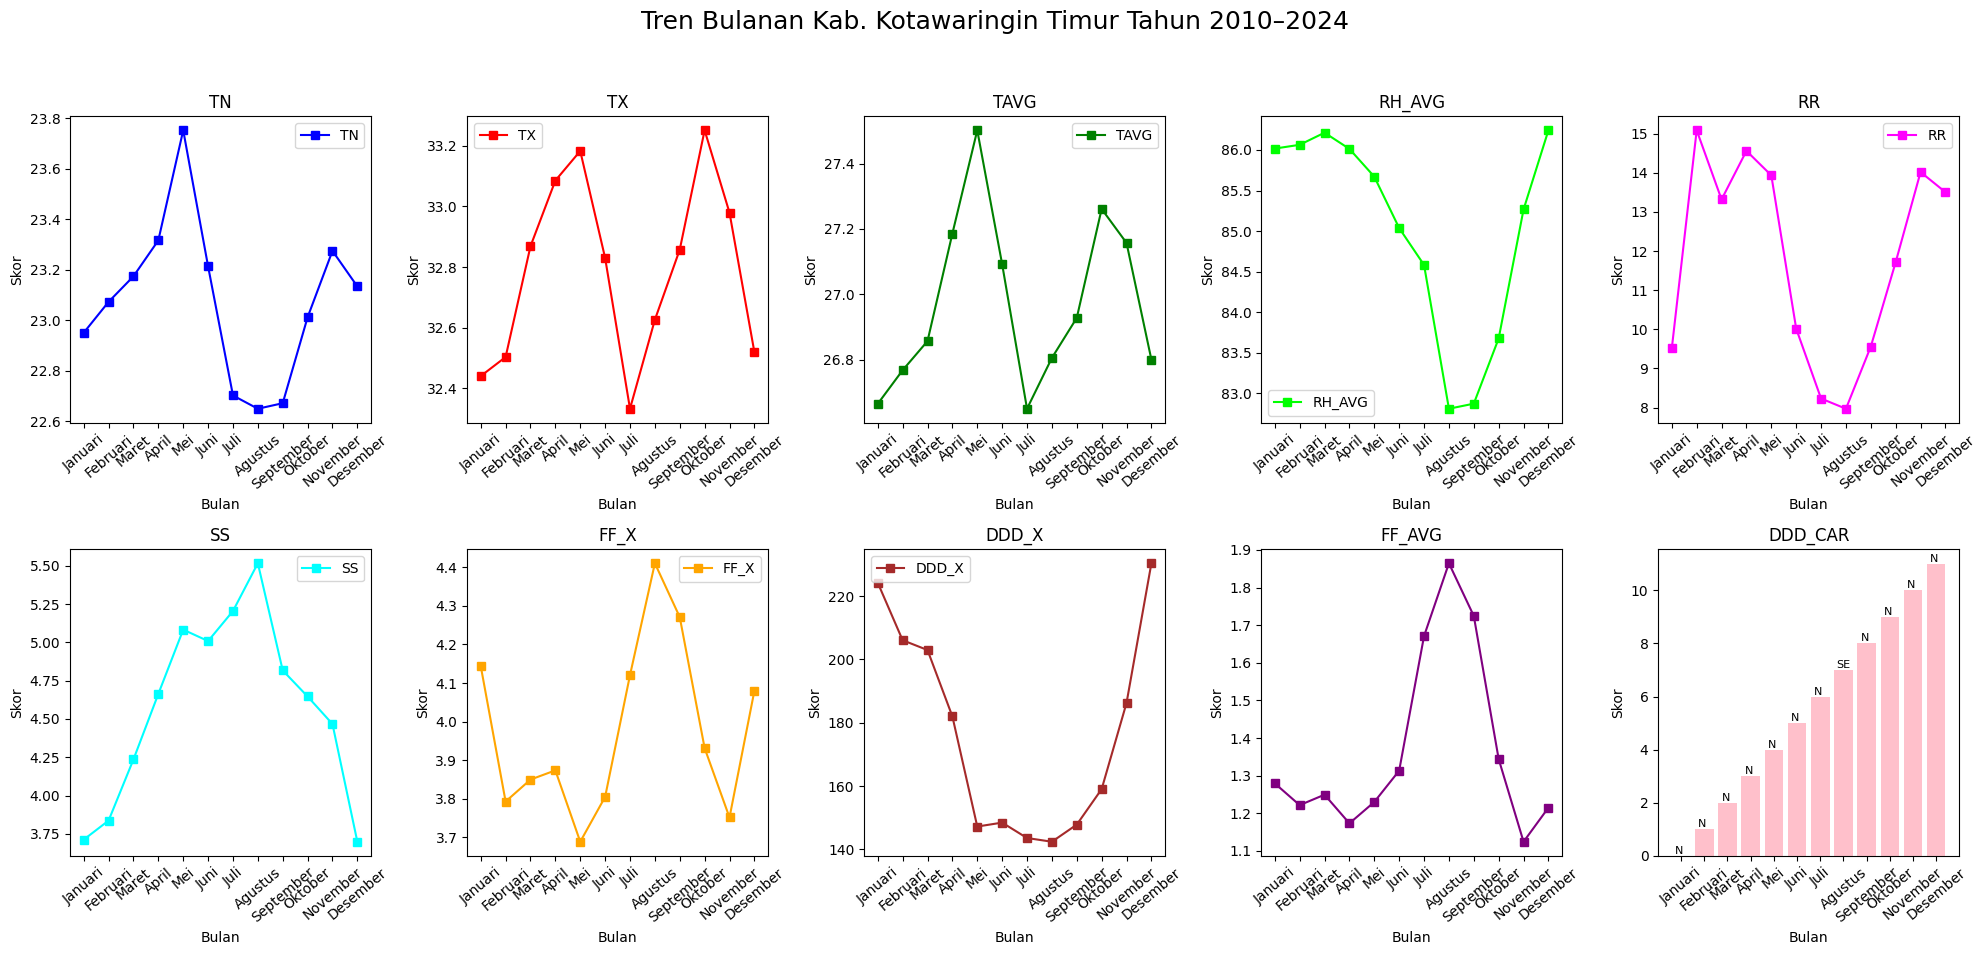

In [12]:
fig = plt.subplots(2, 5, figsize=(20, 10))

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
bulan_labels = ['Januari','Februari','Maret','April','Mei','Juni',
                'Juli','Agustus','September','Oktober','November','Desember']

plt.subplot(2, 5, 1)
df_data.groupby('Bulan')['TN'].mean().plot(marker='s', legend=True, color='blue')
plt.xticks(range(1,13), bulan_labels, rotation=40)
plt.title('TN')
plt.ylabel('Skor')
plt.xlabel('Bulan')

plt.subplot(2, 5, 2)
df_data.groupby('Bulan')['TX'].mean().plot(marker='s', legend=True, color='red')
plt.xticks(range(1,13), bulan_labels, rotation=40)
plt.title('TX')
plt.ylabel('Skor')
plt.xlabel('Bulan')

plt.subplot(2, 5, 3)
df_data.groupby('Bulan')['TAVG'].mean().plot(marker='s', legend=True, color='green')
plt.xticks(range(1,13), bulan_labels, rotation=40)
plt.title('TAVG')
plt.ylabel('Skor')
plt.xlabel('Bulan')

plt.subplot(2, 5, 4)
df_data.groupby('Bulan')['RH_AVG'].mean().plot(marker='s', legend=True, color='lime')
plt.xticks(range(1,13), bulan_labels, rotation=40)
plt.title('RH_AVG')
plt.ylabel('Skor')
plt.xlabel('Bulan')

plt.subplot(2, 5, 5)
df_data.groupby('Bulan')['RR'].mean().plot(marker='s', legend=True, color='magenta')
plt.xticks(range(1,13), bulan_labels, rotation=40)
plt.title('RR')
plt.ylabel('Skor')
plt.xlabel('Bulan')

plt.subplot(2, 5, 6)
df_data.groupby('Bulan')['SS'].mean().plot(marker='s', legend=True, color='aqua')
plt.xticks(range(1,13), bulan_labels, rotation=40)
plt.title('SS')
plt.ylabel('Skor')
plt.xlabel('Bulan')

plt.subplot(2, 5, 7)
df_data.groupby('Bulan')['FF_X'].mean().plot(marker='s', legend=True, color='orange')
plt.xticks(range(1,13), bulan_labels, rotation=40)
plt.title('FF_X')
plt.ylabel('Skor')
plt.xlabel('Bulan')

plt.subplot(2, 5, 8)
df_data.groupby('Bulan')['DDD_X'].mean().plot(marker='s', legend=True, color='brown')
plt.xticks(range(1,13), bulan_labels, rotation=40)
plt.title('DDD_X')
plt.ylabel('Skor')
plt.xlabel('Bulan')

plt.subplot(2, 5, 9)
df_data.groupby('Bulan')['FF_AVG'].mean().plot(marker='s', color='purple')
plt.xticks(range(1,13), bulan_labels, rotation=40)
plt.title('FF_AVG')
plt.ylabel('Skor')
plt.xlabel('Bulan')

plt.subplot(2, 5, 10)
dominant_wind = df_data.groupby('Bulan')['DDD_CAR'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
dummy_values = list(range(len(dominant_wind)))
plt.bar(dominant_wind.index, dummy_values, color='pink')
for i, (month, direction) in enumerate(dominant_wind.items()):
    plt.text(month, dummy_values[i], direction, ha='center', va='bottom', fontsize=8)
plt.title('DDD_CAR')
plt.ylabel('Skor')
plt.xlabel('Bulan')
plt.xticks(range(1,13), bulan_labels, rotation=40)

plt.suptitle("Tren Bulanan Kab. Kotawaringin Timur Tahun 2010–2024", fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [13]:
df_data['TANGGAL'] = pd.to_datetime(df_data['TANGGAL'])

In [14]:
# Membuat kolom 'Hari' dalam bahasa Indonesia
hari_id = {
    'Monday': 'Senin',
    'Tuesday': 'Selasa',
    'Wednesday': 'Rabu',
    'Thursday': 'Kamis',
    'Friday': 'Jumat',
    'Saturday': 'Sabtu',
    'Sunday': 'Minggu'
}
df_data['Hari'] = df_data['TANGGAL'].dt.day_name().map(hari_id)

urutan_hari = ['Senin','Selasa','Rabu','Kamis','Jumat','Sabtu','Minggu']

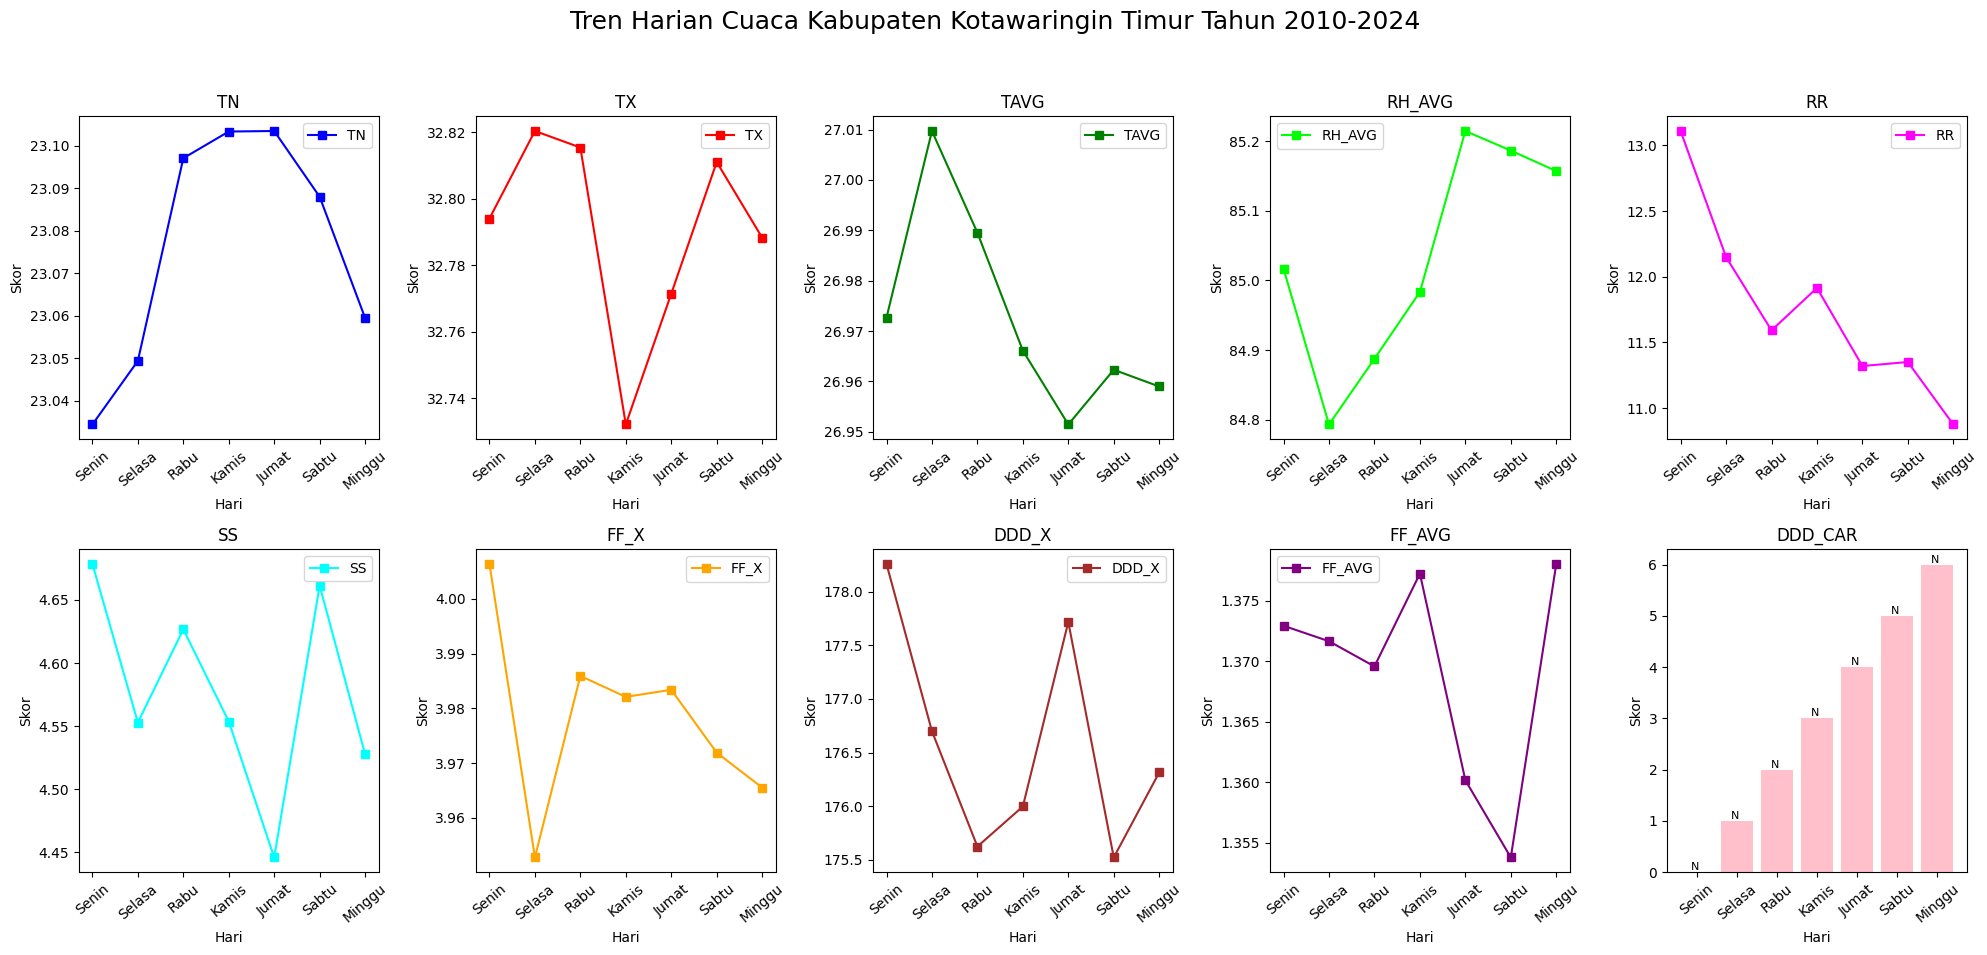

In [15]:
fig = plt.subplots(2, 5, figsize=(20,10))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

plt.subplot(2, 5, 1)
df_data.groupby('Hari')['TN'].mean().reindex(urutan_hari).plot(marker='s', legend=True, color='blue')
plt.xticks(range(7), urutan_hari, rotation=40)
plt.title('TN')
plt.ylabel('Skor')
plt.xlabel('Hari')

plt.subplot(2, 5, 2)
df_data.groupby('Hari')['TX'].mean().reindex(urutan_hari).plot(marker='s', legend=True, color='red')
plt.xticks(range(7), urutan_hari, rotation=40)
plt.title('TX')
plt.ylabel('Skor')
plt.xlabel('Hari')

plt.subplot(2, 5, 3)
df_data.groupby('Hari')['TAVG'].mean().reindex(urutan_hari).plot(marker='s', legend=True, color='green')
plt.xticks(range(7), urutan_hari, rotation=40)
plt.title('TAVG')
plt.ylabel('Skor')
plt.xlabel('Hari')

plt.subplot(2, 5, 4)
df_data.groupby('Hari')['RH_AVG'].mean().reindex(urutan_hari).plot(marker='s', legend=True, color='lime')
plt.xticks(range(7), urutan_hari, rotation=40)
plt.title('RH_AVG')
plt.ylabel('Skor')
plt.xlabel('Hari')

plt.subplot(2, 5, 5)
df_data.groupby('Hari')['RR'].mean().reindex(urutan_hari).plot(marker='s', legend=True, color='magenta')
plt.xticks(range(7), urutan_hari, rotation=40)
plt.title('RR')
plt.ylabel('Skor')
plt.xlabel('Hari')

plt.subplot(2, 5, 6)
df_data.groupby('Hari')['SS'].mean().reindex(urutan_hari).plot(marker='s', legend=True, color='aqua')
plt.xticks(range(7), urutan_hari, rotation=40)
plt.title('SS')
plt.ylabel('Skor')
plt.xlabel('Hari')

plt.subplot(2, 5, 7)
df_data.groupby('Hari')['FF_X'].mean().reindex(urutan_hari).plot(marker='s', legend=True, color='orange')
plt.xticks(range(7), urutan_hari, rotation=40)
plt.title('FF_X')
plt.ylabel('Skor')
plt.xlabel('Hari')

plt.subplot(2, 5, 8)
df_data.groupby('Hari')['DDD_X'].mean().reindex(urutan_hari).plot(marker='s', legend=True, color='brown')
plt.xticks(range(7), urutan_hari, rotation=40)
plt.title('DDD_X')
plt.ylabel('Skor')
plt.xlabel('Hari')

plt.subplot(2, 5, 9)
df_data.groupby('Hari')['FF_AVG'].mean().reindex(urutan_hari).plot(marker='s', legend=True, color='purple')
plt.xticks(range(7), urutan_hari, rotation=40)
plt.title('FF_AVG')
plt.ylabel('Skor')
plt.xlabel('Hari')

plt.subplot(2, 5, 10)
dominant_wind_daily = df_data.groupby('Hari')['DDD_CAR'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None).reindex(urutan_hari)
dummy_values = range(len(dominant_wind_daily))
plt.bar(dominant_wind_daily.index, dummy_values, color='pink')
for i, (hari, arah) in enumerate(dominant_wind_daily.items()):
    plt.text(hari, dummy_values[i], str(arah), ha='center', va='bottom', fontsize=8)
plt.xticks(range(7), urutan_hari, rotation=40)
plt.title('DDD_CAR')
plt.ylabel('Skor')
plt.xlabel('Hari')

plt.suptitle("Tren Harian Cuaca Kabupaten Kotawaringin Timur Tahun 2010-2024", fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


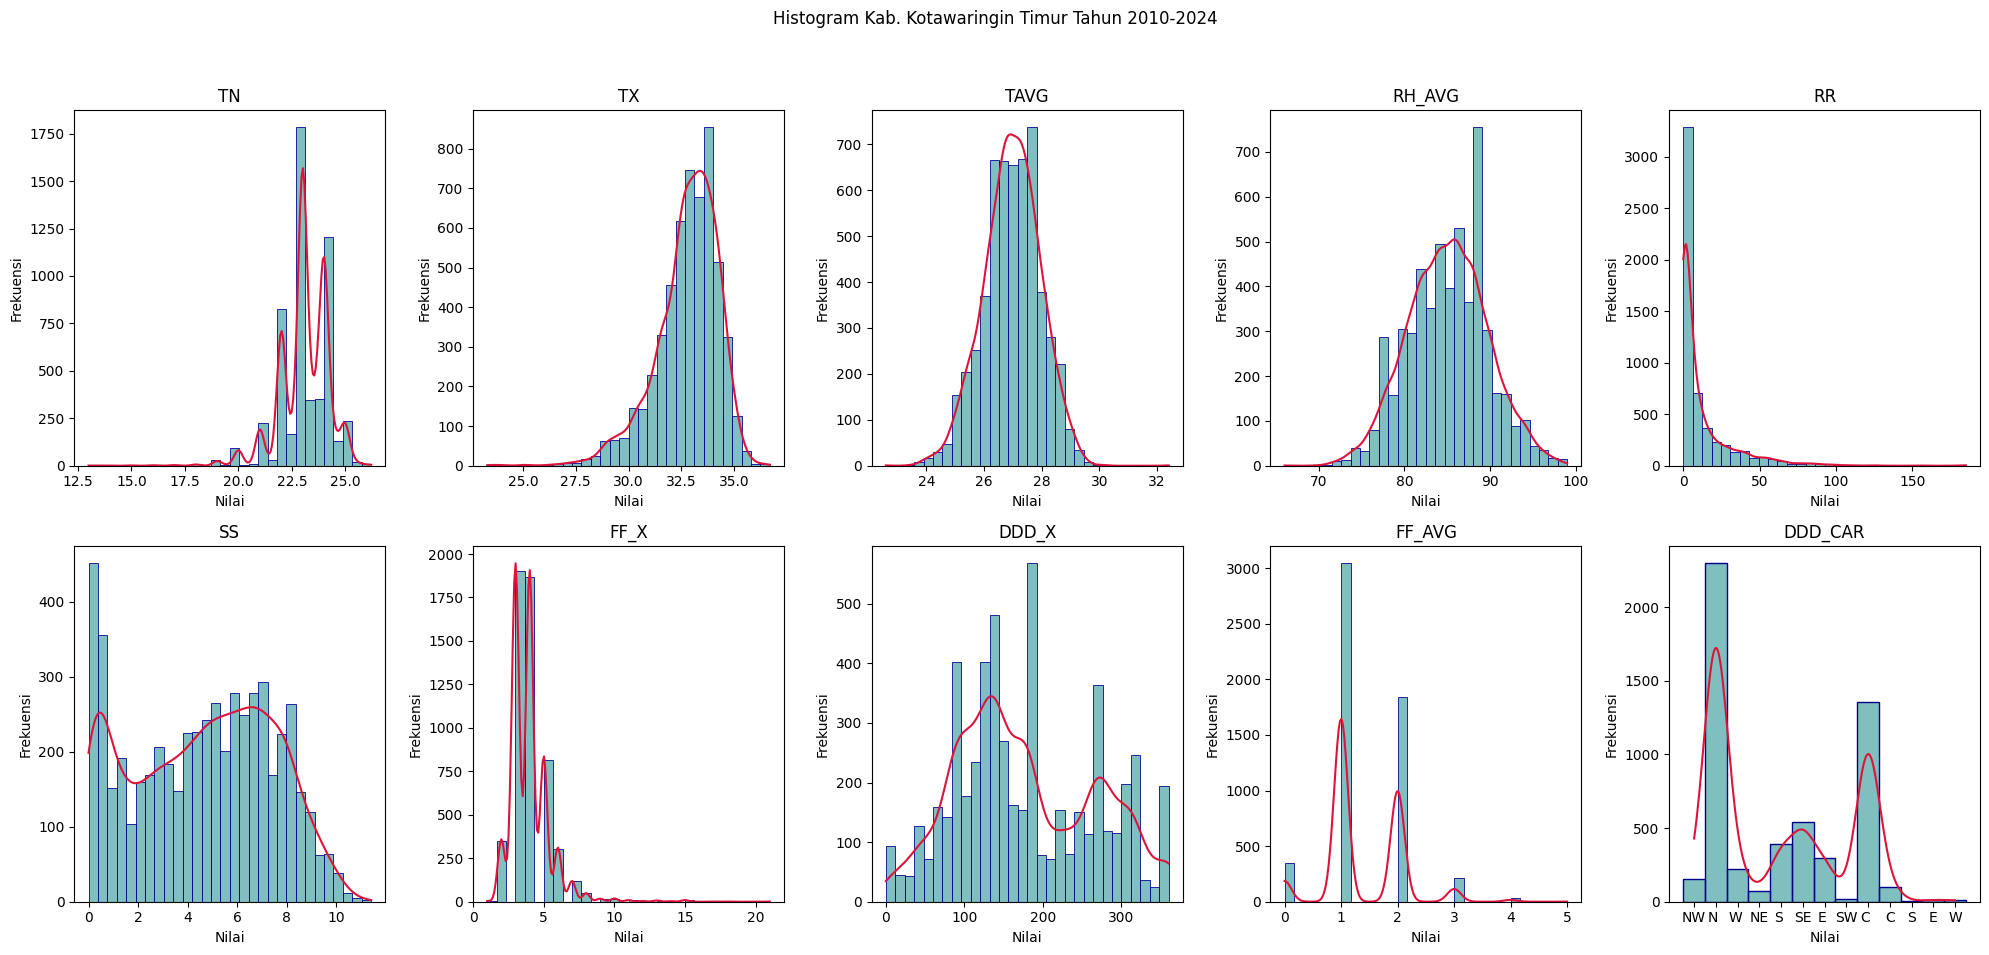

In [16]:
fig = plt.subplots(2, 5, figsize=(20, 10))

plt.subplot(2, 5, 1)
ax = sns.histplot(df_data['TN'], bins=30, kde=True, color='teal', edgecolor='darkblue')
ax.lines[0].set_color('crimson')
plt.title('TN')
plt.ylabel('Frekuensi')
plt.xlabel('Nilai')

plt.subplot(2, 5, 2)
ax = sns.histplot(df_data['TX'], bins=30, kde=True, color='teal', edgecolor='darkblue')
ax.lines[0].set_color('crimson')
plt.title('TX')
plt.ylabel('Frekuensi')
plt.xlabel('Nilai')

plt.subplot(2, 5, 3)
ax = sns.histplot(df_data['TAVG'], bins=30, kde=True, color='teal', edgecolor='darkblue')
ax.lines[0].set_color('crimson')
plt.title('TAVG')
plt.ylabel('Frekuensi')
plt.xlabel('Nilai')

plt.subplot(2, 5, 4)
ax = sns.histplot(df_data['RH_AVG'], bins=30, kde=True, color='teal', edgecolor='darkblue')
ax.lines[0].set_color('crimson')
plt.title('RH_AVG')
plt.ylabel('Frekuensi')
plt.xlabel('Nilai')

plt.subplot(2, 5, 5)
ax = sns.histplot(df_data['RR'], bins=30, kde=True, color='teal', edgecolor='darkblue')
ax.lines[0].set_color('crimson')
plt.title('RR')
plt.ylabel('Frekuensi')
plt.xlabel('Nilai')

plt.subplot(2, 5, 6)
ax = sns.histplot(df_data['SS'], bins=30, kde=True, color='teal', edgecolor='darkblue')
ax.lines[0].set_color('crimson')
plt.title('SS')
plt.ylabel('Frekuensi')
plt.xlabel('Nilai')

plt.subplot(2, 5, 7)
ax = sns.histplot(df_data['FF_X'], bins=30, kde=True, color='teal', edgecolor='darkblue')
ax.lines[0].set_color('crimson')
plt.title('FF_X')
plt.ylabel('Frekuensi')
plt.xlabel('Nilai')

plt.subplot(2, 5, 8)
ax = sns.histplot(df_data['DDD_X'], bins=30, kde=True, color='teal', edgecolor='darkblue')
ax.lines[0].set_color('crimson')
plt.title('DDD_X')
plt.ylabel('Frekuensi')
plt.xlabel('Nilai')

plt.subplot(2, 5, 9)
ax = sns.histplot(df_data['FF_AVG'], bins=30, kde=True, color='teal', edgecolor='darkblue')
ax.lines[0].set_color('crimson')
plt.title('FF_AVG')
plt.ylabel('Frekuensi')
plt.xlabel('Nilai')

plt.subplot(2, 5, 10)
ax = sns.histplot(df_data['DDD_CAR'], bins=30, kde=True, color='teal', edgecolor='darkblue')
ax.lines[0].set_color('crimson')
plt.title('DDD_CAR')
plt.ylabel('Frekuensi')
plt.xlabel('Nilai')

plt.suptitle("Histogram Kab. Kotawaringin Timur Tahun 2010-2024")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [18]:
df_data = df_data.drop(['TANGGAL', 'Tahun', 'Bulan'], axis=1, errors='ignore')

In [19]:
 c = df_data.select_dtypes(include=['number']).corr()
 c

,TN,TX,TAVG,RH_AVG,RR,SS,FF_X,DDD_X,FF_AVG
TN,1.000000,0.033970,0.300078,0.238798,0.054920,0.021429,-0.139593,-0.045228,-0.177369
TX,0.033970,1.000000,0.682795,-0.573363,-0.140179,0.152618,0.048808,-0.088367,0.137392
TAVG,0.300078,0.682795,1.000000,-0.608606,-0.120497,0.149456,-0.062412,-0.160099,0.063035
RH_AVG,0.238798,-0.573363,-0.608606,1.000000,0.236065,-0.142922,-0.105768,0.098241,-0.387991
RR,0.054920,-0.140179,-0.120497,0.236065,1.000000,-0.024284,-0.046922,0.014520,-0.140229
SS,0.021429,0.152618,0.149456,-0.142922,-0.024284,1.000000,0.067868,-0.094883,0.162410
FF_X,-0.139593,0.048808,-0.062412,-0.105768,-0.046922,0.067868,1.000000,0.099122,0.444940
DDD_X,-0.045228,-0.088367,-0.160099,0.098241,0.014520,-0.094883,0.099122,1.000000,0.002788
FF_AVG,-0.177369,0.137392,0.063035,-0.387991,-0.140229,0.162410,0.444940,0.002788,1.000000


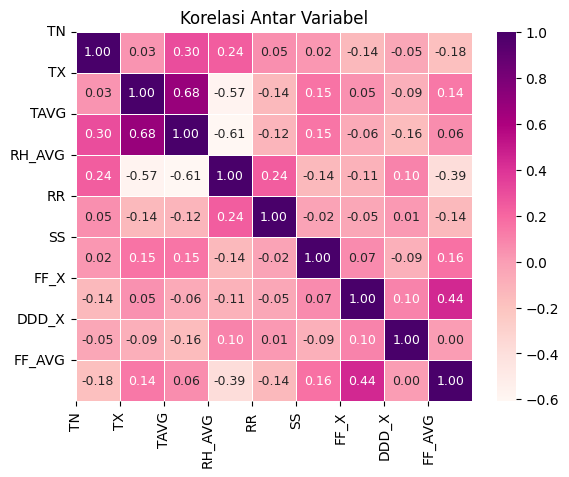

In [20]:
hm = sns.heatmap(data=c, annot=True, fmt=".2f", linewidths=0.5, cmap='RdPu', annot_kws={"size": 9})
plt.title("Korelasi Antar Variabel")
plt.xticks(range(len(c.columns)), c.columns, rotation=90)
plt.yticks(range(len(c.columns)), c.columns)
plt.show()